In [7]:
import sys
import os
import pandas as pd
import os


project_root_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) # Sesuaikan jika perlu
if project_root_path not in sys.path:
    sys.path.append(project_root_path)

In [8]:
from src.visualization import plot_utils

In [ ]:
path_to_folder = '../data/processed/'
df = pd.read_csv(os.path.join(path_to_folder, 'dataset_gabungan.csv'))
df

original_index                                       url_original  \
0                    0  https://www.nationofblue.com/madness-tickets-s...   
1                    3  http://damp.ringgatan.se/618e9jy89z\nfergumi.m...   
2                    1  https://www.encyclopedia.farlex.com/vulgar+fra...   
3                    4  http://bluga.com.ar/fran/googledocs/login.php?...   
4                    2  https://www.canadianbusiness.com/article/49690...   
...                ...                                                ...   
141210            1135             http://europalamp.com/lacaixa/lacaixa/   
141211             327  https://www.manta.com/c/mmsfrh7/john-c-moreau-dds   
141212            1140  http://meet-memebersdirec.com/ads/newdocs/newd...   
141213             328             https://www.twitter.com/thelionelblair   
141214            1142       http://chun-engrg.com/Shaba/GD1/GD/index.php   

              type  IP_Address  URL_Length  URL_Shortening  \
0       legitimate         1.0        59.0             1.0   
1         phishing         1.0        77.0             1.0   
2       legitimate         1.0        51.0            -1.0   
3         phishing         1.0        97.0             1.0   
4       legitimate         1.0        85.0             1.0   
...            ...         ...         ...             ...   
141210    phishing         1.0        38.0             1.0   
141211  legitimate         1.0        49.0             1.0   
141212    phishing         1.0        73.0             1.0   
141213  legitimate         1.0        38.0             1.0   
141214    phishing         1.0        44.0             1.0   

        Double_Slash_Redirect_After_HTTPS  Hyphen_in_Domain_Name  \
0                                     1.0                    1.0   
1                                     1.0                    1.0   
2                                     1.0                    1.0   
3                                     1.0                    1.0   
4                                     1.0                    1.0   
...                                   ...                    ...   
141210                                1.0                    1.0   
141211                                1.0                    1.0   
141212                                1.0                   -1.0   
141213                                1.0                    1.0   
141214                                1.0                   -1.0   

        Presence_of_Subdomain  Uses_HTTPS_Protocol  ...  \
0                         2.0                  1.0  ...   
1                         6.0                 -1.0  ...   
2                         3.0                  1.0  ...   
3                         3.0                 -1.0  ...   
4                         2.0                  1.0  ...   
...                       ...                  ...  ...   
141210                    1.0                 -1.0  ...   
141211                    2.0                  1.0  ...   
141212                    1.0                 -1.0  ...   
141213                    2.0                  1.0  ...   
141214                    2.0                 -1.0  ...   

        External_CSS_and_JS_Resources  External_Form_Submission  \
0                                -1.0                      -1.0   
1                                -1.0                      -1.0   
2                                -1.0                      -1.0   
3                                -1.0                      -1.0   
4                                -1.0                      -1.0   
...                               ...                       ...   
141210                           -1.0                      -1.0   
141211                           -1.0                      -1.0   
141212                           -1.0                      -1.0   
141213                           -1.0                      -1.0   
141214                           -1.0                      -1.0   

       

In [10]:
# Cek apakah ada nilai NaN
if df.isnull().values.any():
    print("DataFrame contains NaN values.")
else:
    print("DataFrame does not contain NaN values.")

DataFrame contains NaN values.


In [11]:
# print baris yang memiliki nilai NaN
print("Rows with NaN values:")
print(df[df.isnull().any(axis=1)])

Rows with NaN values:
       original_index                                       url_original  \
77009           54958  https://www.markwatches.net/reviews/2011/07/ma...   

             type  IP_Address  URL_Length  URL_Shortening  \
77009  legitimate         NaN         NaN             NaN   

       Double_Slash_Redirect_After_HTTPS  Hyphen_in_Domain_Name  \
77009                                NaN                    NaN   

       Presence_of_Subdomain  Uses_HTTPS_Protocol  ...  \
77009                    NaN                  NaN  ...   

       External_CSS_and_JS_Resources  External_Form_Submission  \
77009                            NaN                       NaN   

       Form_Submits_to_Email_Address  HTTP_Response_Status_Content  \
77009                            NaN                           NaN   

       Number_of_Redirects  Mouseover_Link_Manipulation  Right_Click_Disabled  \
77009                  NaN                          NaN                   NaN   

       Popup_

In [12]:
# Drop baris yang memiliki nilai NaN
df = df.dropna()

In [13]:
df_semi_clean = df.copy()
# Isi kolom original index dengan kolom baru bernama new_index_for_process, ambil dulu indexnya
df_semi_clean['original_index'] = df_semi_clean.index
# rename kolom new_index_for_process menjadi index
df_semi_clean.rename(columns={'original_index': 'new_index_for_process'}, inplace=True)
df_semi_clean

new_index_for_process  \
0                           0   
1                           1   
2                           2   
3                           3   
4                           4   
...                       ...   
141210                 141210   
141211                 141211   
141212                 141212   
141213                 141213   
141214                 141214   

                                             url_original        type  \
0       https://www.nationofblue.com/madness-tickets-s...  legitimate   
1       http://damp.ringgatan.se/618e9jy89z\nfergumi.m...    phishing   
2       https://www.encyclopedia.farlex.com/vulgar+fra...  legitimate   
3       http://bluga.com.ar/fran/googledocs/login.php?...    phishing   
4       https://www.canadianbusiness.com/article/49690...  legitimate   
...                                                   ...         ...   
141210             http://europalamp.com/lacaixa/lacaixa/    phishing   
141211  https://www.manta.com/c/mmsfrh7/john-c-moreau-dds  legitimate   
141212  http://meet-memebersdirec.com/ads/newdocs/newd...    phishing   
141213             https://www.twitter.com/thelionelblair  legitimate   
141214       http://chun-engrg.com/Shaba/GD1/GD/index.php    phishing   

        IP_Address  URL_Length  URL_Shortening  \
0              1.0        59.0             1.0   
1              1.0        77.0             1.0   
2              1.0        51.0            -1.0   
3              1.0        97.0             1.0   
4              1.0        85.0             1.0   
...            ...         ...             ...   
141210         1.0        38.0             1.0   
141211         1.0        49.0             1.0   
141212         1.0        73.0             1.0   
141213         1.0        38.0             1.0   
141214         1.0        44.0             1.0   

        Double_Slash_Redirect_After_HTTPS  Hyphen_in_Domain_Name  \
0                                     1.0                    1.0   
1                                     1.0                    1.0   
2                                     1.0                    1.0   
3                                     1.0                    1.0   
4                                     1.0                    1.0   
...                                   ...                    ...   
141210                                1.0                    1.0   
141211                                1.0                    1.0   
141212                                1.0                   -1.0   
141213                                1.0                    1.0   
141214                                1.0                   -1.0   

        Presence_of_Subdomain  Uses_HTTPS_Protocol  ...  \
0                         2.0                  1.0  ...   
1                         6.0                 -1.0  ...   
2                         3.0                  1.0  ...   
3                         3.0                 -1.0  ...   
4                         2.0                  1.0  ...   
...                       ...                  ...  ...   
141210                    1.0                 -1.0  ...   
141211                    2.0                  1.0  ...   
141212                    1.0                 -1.0  ...   
141213                    2.0                  1.0  ...   
141214                    2.0                 -1.0  ...   

        External_CSS_and_JS_Resources  External_Form_Submission  \
0                                -1.0                      -1.0   
1                                -1.0                      -1.0   
2                                -1.0                      -1.0   
3                                -1.0                      -1.0   
4                                -1.0                      -1.0   
...                               ...                       ...   
141210                           -1.0                      -1.0   
141211                           -1.0                      -1.0   
1412

In [14]:
df_proses = df_semi_clean.iloc[:, 1:24]
df_proses

url_original        type  \
0       https://www.nationofblue.com/madness-tickets-s...  legitimate   
1       http://damp.ringgatan.se/618e9jy89z\nfergumi.m...    phishing   
2       https://www.encyclopedia.farlex.com/vulgar+fra...  legitimate   
3       http://bluga.com.ar/fran/googledocs/login.php?...    phishing   
4       https://www.canadianbusiness.com/article/49690...  legitimate   
...                                                   ...         ...   
141210             http://europalamp.com/lacaixa/lacaixa/    phishing   
141211  https://www.manta.com/c/mmsfrh7/john-c-moreau-dds  legitimate   
141212  http://meet-memebersdirec.com/ads/newdocs/newd...    phishing   
141213             https://www.twitter.com/thelionelblair  legitimate   
141214       http://chun-engrg.com/Shaba/GD1/GD/index.php    phishing   

        IP_Address  URL_Length  URL_Shortening  \
0              1.0        59.0             1.0   
1              1.0        77.0             1.0   
2              1.0        51.0            -1.0   
3              1.0        97.0             1.0   
4              1.0        85.0             1.0   
...            ...         ...             ...   
141210         1.0        38.0             1.0   
141211         1.0        49.0             1.0   
141212         1.0        73.0             1.0   
141213         1.0        38.0             1.0   
141214         1.0        44.0             1.0   

        Double_Slash_Redirect_After_HTTPS  Hyphen_in_Domain_Name  \
0                                     1.0                    1.0   
1                                     1.0                    1.0   
2                                     1.0                    1.0   
3                                     1.0                    1.0   
4                                     1.0                    1.0   
...                                   ...                    ...   
141210                                1.0                    1.0   
141211                                1.0                    1.0   
141212                                1.0                   -1.0   
141213                                1.0                    1.0   
141214                                1.0                   -1.0   

        Presence_of_Subdomain  Uses_HTTPS_Protocol  \
0                         2.0                  1.0   
1                         6.0                 -1.0   
2                         3.0                  1.0   
3                         3.0                 -1.0   
4                         2.0                  1.0   
...                       ...                  ...   
141210                    1.0                 -1.0   
141211                    2.0                  1.0   
141212                    1.0                 -1.0   
141213                    2.0                  1.0   
141214                    2.0                 -1.0   

        Favicon_Source_Consistency  ...  External_CSS_and_JS_Resources  \
0                             -1.0  ...                           -1.0   
1                             -1.0  ...                           -1.0   
2                             -1.0  ...                           -1.0   
3                             -1.0  ...                           -1.0   
4                             -1.0  ...                           -1.0   
...                            ...  ...                            ...   
141210                        -1.0  ...                           -1.0   
141211                        -1.0  ...                           -1.0   
141212                        -1.0  ...                           -1.0   
141213                        -1.0  ...                           -1.0   
141214                        -1.0  ...                           -1.0   

        External_Form_Submission  Form_Submits_to_Email_Address  \
0                           -1.0                           -1.0   
1                           -1.0                           -1.0   
2          

In [15]:
df_proses['type'] = df_proses['type'].map({'legitimate': 0, 'phishing': 1})
df_proses

url_original  type  IP_Address  \
0       https://www.nationofblue.com/madness-tickets-s...     0         1.0   
1       http://damp.ringgatan.se/618e9jy89z\nfergumi.m...     1         1.0   
2       https://www.encyclopedia.farlex.com/vulgar+fra...     0         1.0   
3       http://bluga.com.ar/fran/googledocs/login.php?...     1         1.0   
4       https://www.canadianbusiness.com/article/49690...     0         1.0   
...                                                   ...   ...         ...   
141210             http://europalamp.com/lacaixa/lacaixa/     1         1.0   
141211  https://www.manta.com/c/mmsfrh7/john-c-moreau-dds     0         1.0   
141212  http://meet-memebersdirec.com/ads/newdocs/newd...     1         1.0   
141213             https://www.twitter.com/thelionelblair     0         1.0   
141214       http://chun-engrg.com/Shaba/GD1/GD/index.php     1         1.0   

        URL_Length  URL_Shortening  Double_Slash_Redirect_After_HTTPS  \
0             59.0             1.0                                1.0   
1             77.0             1.0                                1.0   
2             51.0            -1.0                                1.0   
3             97.0             1.0                                1.0   
4             85.0             1.0                                1.0   
...            ...             ...                                ...   
141210        38.0             1.0                                1.0   
141211        49.0             1.0                                1.0   
141212        73.0             1.0                                1.0   
141213        38.0             1.0                                1.0   
141214        44.0             1.0                                1.0   

        Hyphen_in_Domain_Name  Presence_of_Subdomain  Uses_HTTPS_Protocol  \
0                         1.0                    2.0                  1.0   
1                         1.0                    6.0                 -1.0   
2                         1.0                    3.0                  1.0   
3                         1.0                    3.0                 -1.0   
4                         1.0                    2.0                  1.0   
...                       ...                    ...                  ...   
141210                    1.0                    1.0                 -1.0   
141211                    1.0                    2.0                  1.0   
141212                   -1.0                    1.0                 -1.0   
141213                    1.0                    2.0                  1.0   
141214                   -1.0                    2.0                 -1.0   

        Favicon_Source_Consistency  ...  External_CSS_and_JS_Resources  \
0                             -1.0  ...                           -1.0   
1                             -1.0  ...                           -1.0   
2                             -1.0  ...                           -1.0   
3                             -1.0  ...                           -1.0   
4                             -1.0  ...                           -1.0   
...                            ...  ...                            ...   
141210                        -1.0  ...                           -1.0   
141211                        -1.0  ...                           -1.0   
141212                        -1.0  ...                           -1.0   
141213                        -1.0  ...                           -1.0   
141214                        -1.0  ...                           -1.0   

        External_Form_Submission  Form_Submits_to_Email_Address  \
0                           -1.0                           -1.0   
1                           -1.0                           -1.0   
2                           -1.0                           -1.0   
3                           -1.0                           -1.0   
4                           -1.0                           -1.0   
...

In [16]:
df_clean = df_proses.iloc[:, 1:]
df_clean

type  IP_Address  URL_Length  URL_Shortening  \
0          0         1.0        59.0             1.0   
1          1         1.0        77.0             1.0   
2          0         1.0        51.0            -1.0   
3          1         1.0        97.0             1.0   
4          0         1.0        85.0             1.0   
...      ...         ...         ...             ...   
141210     1         1.0        38.0             1.0   
141211     0         1.0        49.0             1.0   
141212     1         1.0        73.0             1.0   
141213     0         1.0        38.0             1.0   
141214     1         1.0        44.0             1.0   

        Double_Slash_Redirect_After_HTTPS  Hyphen_in_Domain_Name  \
0                                     1.0                    1.0   
1                                     1.0                    1.0   
2                                     1.0                    1.0   
3                                     1.0                    1.0   
4                                     1.0                    1.0   
...                                   ...                    ...   
141210                                1.0                    1.0   
141211                                1.0                    1.0   
141212                                1.0                   -1.0   
141213                                1.0                    1.0   
141214                                1.0                   -1.0   

        Presence_of_Subdomain  Uses_HTTPS_Protocol  \
0                         2.0                  1.0   
1                         6.0                 -1.0   
2                         3.0                  1.0   
3                         3.0                 -1.0   
4                         2.0                  1.0   
...                       ...                  ...   
141210                    1.0                 -1.0   
141211                    2.0                  1.0   
141212                    1.0                 -1.0   
141213                    2.0                  1.0   
141214                    2.0                 -1.0   

        Favicon_Source_Consistency  Custom_Port_Usage  ...  \
0                             -1.0                1.0  ...   
1                             -1.0                1.0  ...   
2                             -1.0                1.0  ...   
3                             -1.0                1.0  ...   
4                             -1.0                1.0  ...   
...                            ...                ...  ...   
141210                        -1.0                1.0  ...   
141211                        -1.0                1.0  ...   
141212                        -1.0                1.0  ...   
141213                        -1.0                1.0  ...   
141214                        -1.0                1.0  ...   

        External_CSS_and_JS_Resources  External_Form_Submission  \
0                                -1.0                      -1.0   
1                                -1.0                      -1.0   
2                                -1.0                      -1.0   
3                                -1.0                      -1.0   
4                                -1.0                      -1.0   
...                               ...                       ...   
141210                           -1.0                      -1.0   
141211                           -1.0                      -1.0   
141212                           -1.0                      -1.0   
141213                           -1.0                      -1.0   
141214                           -1.0                      -1.0   

        Form_Submits_to_Email_Address  HTTP_Response_Status_Content  \
0                                -1.0                           1.0   
1                                -1.0                          -1.0   
2                                -1.0                          -1.0   
3                                -1

<Figure size 640x480 with 0 Axes>

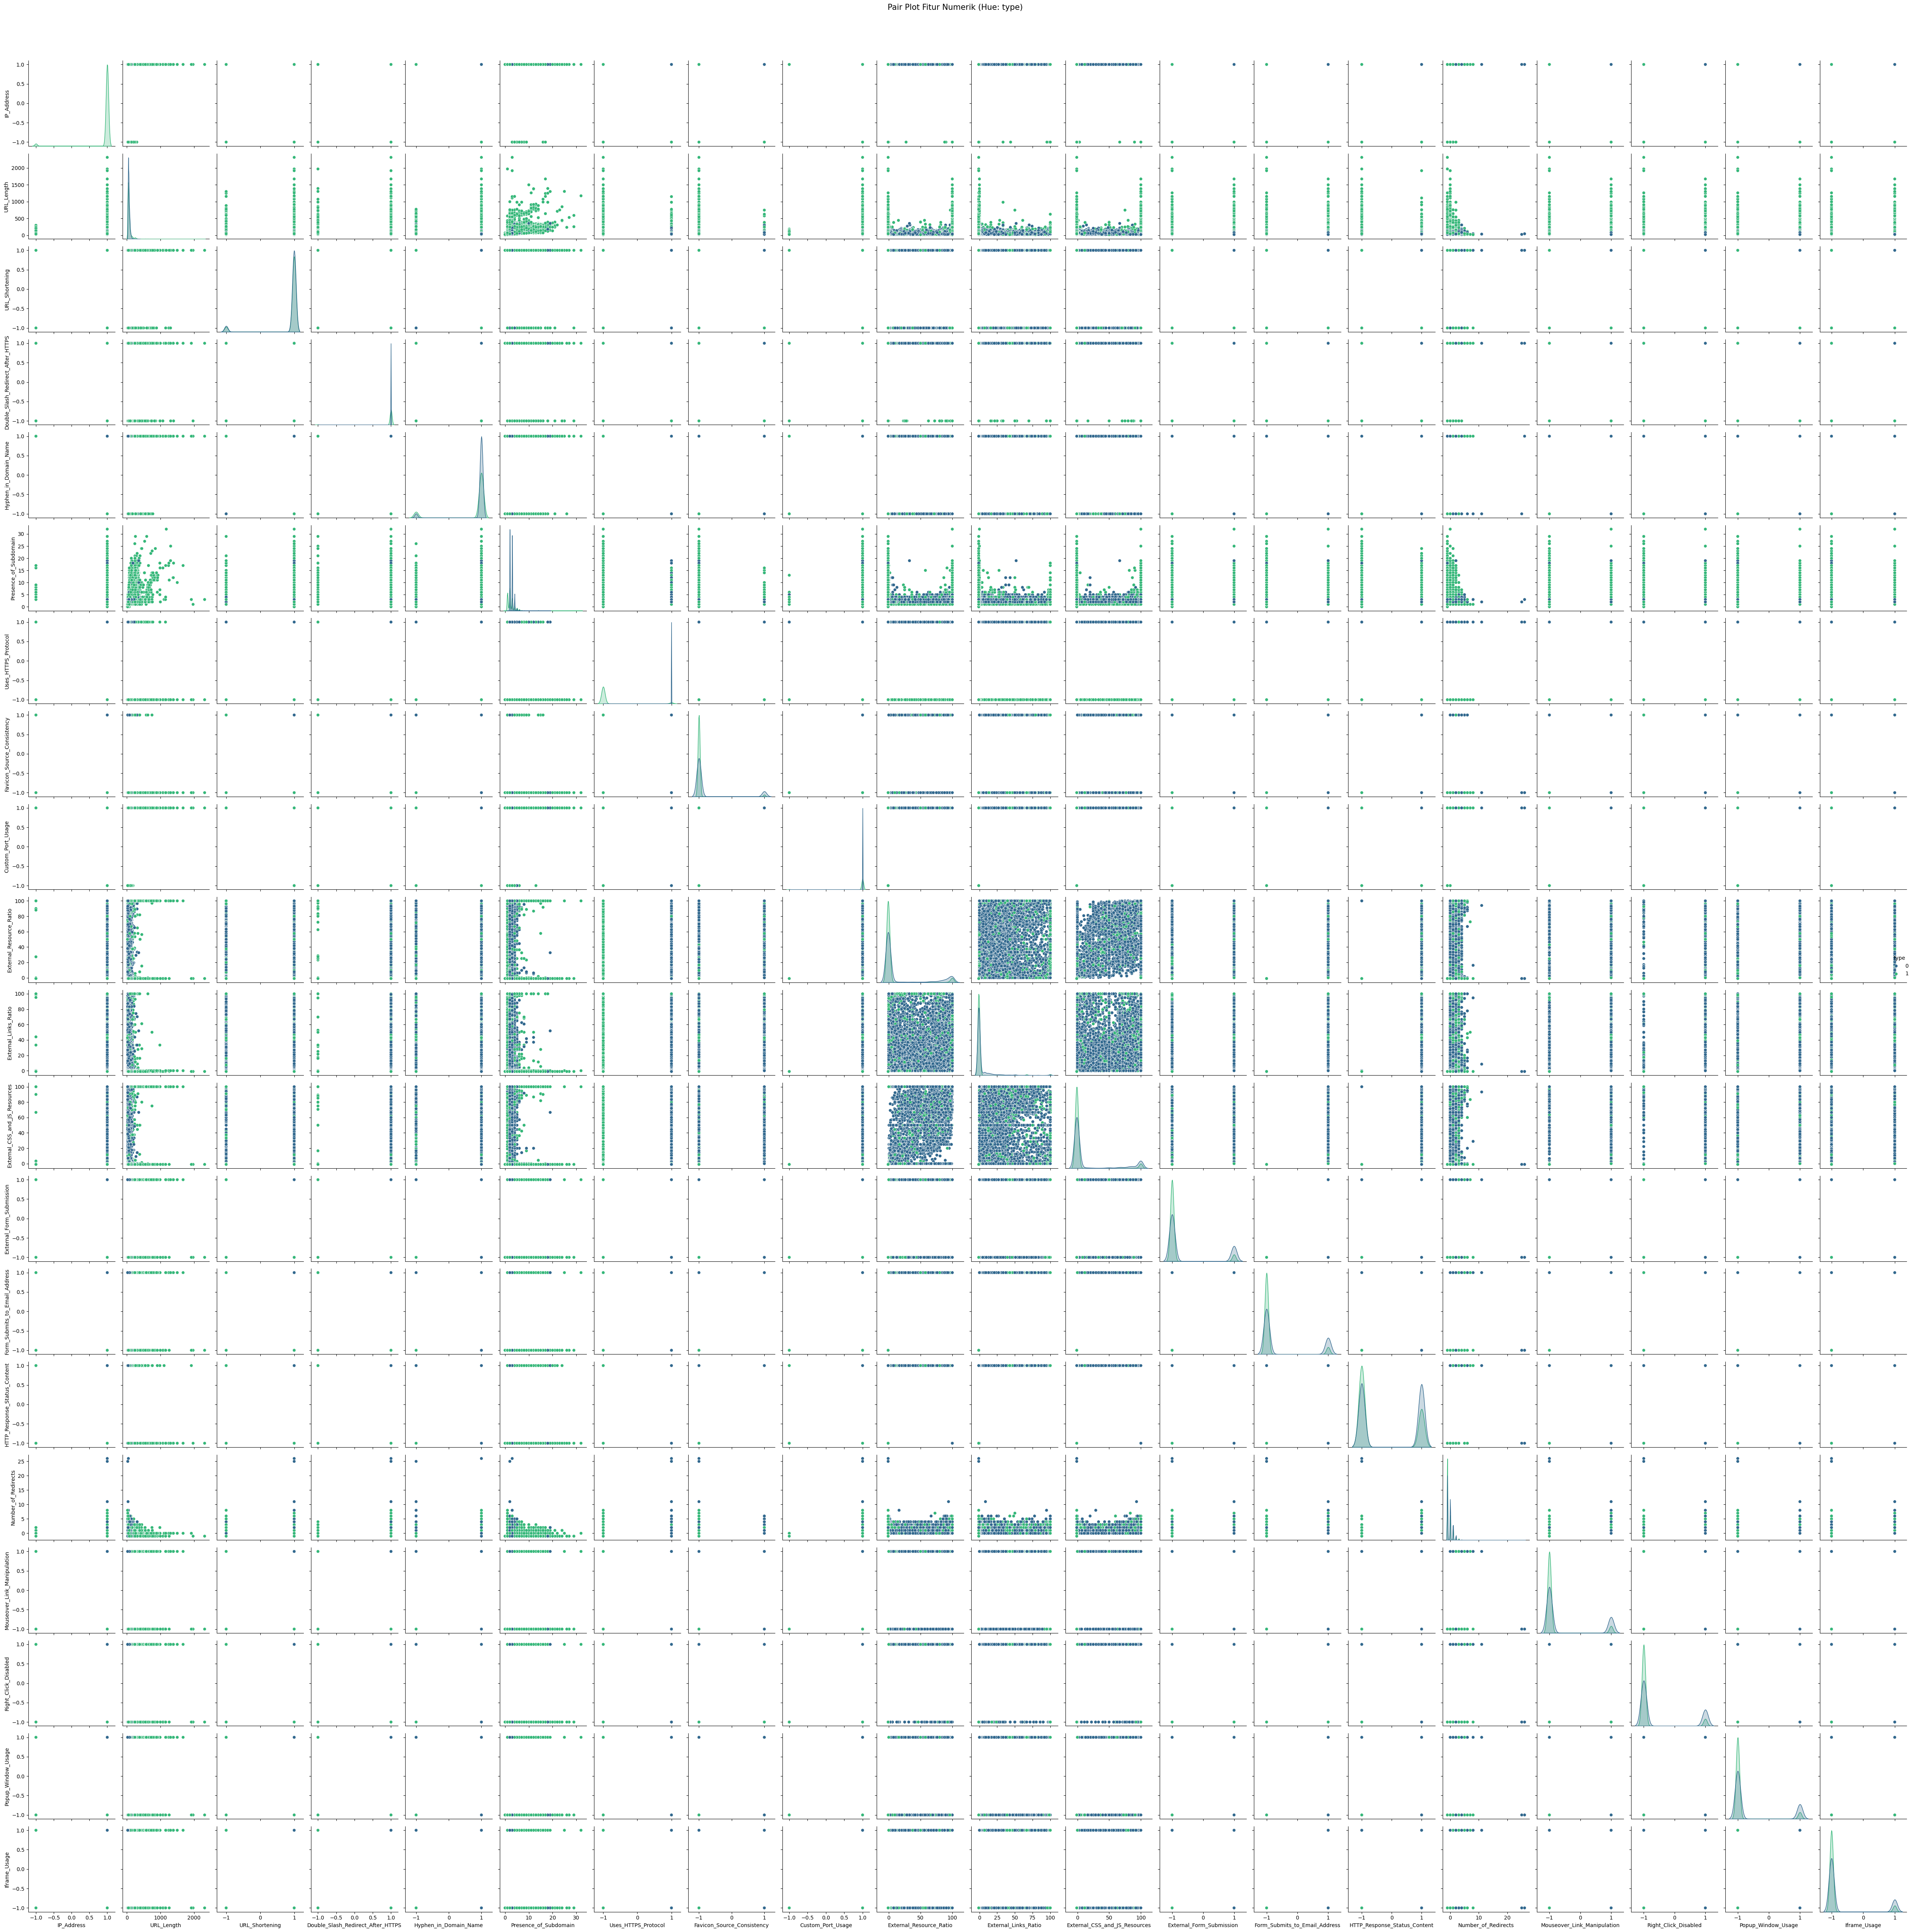

In [45]:
plot_utils.plot_pairplot(df_clean,hue_col='type')

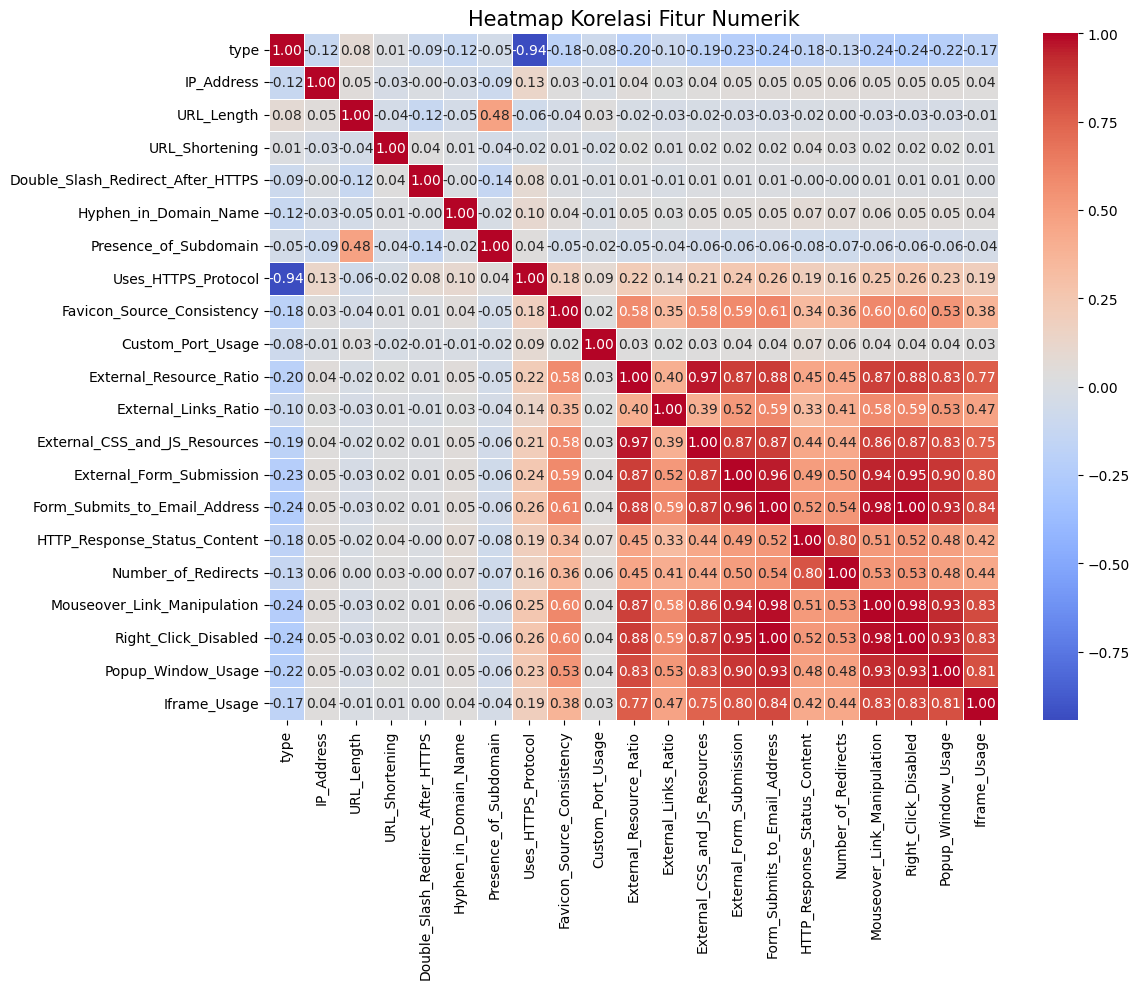

In [23]:
plot_utils.plot_correlation_heatmap(df_clean)

In [18]:
# save data_clean to csv to specified folder
path_to_save = '../data/interim/'
df_clean.to_csv(os.path.join(path_to_save, 'dataset_clean.csv'), index=False)